# <span style='color:#00BB27'>Notebook 6 - Résaux de neuronnes</span>

### Perceptron multi-couches

CSI4506 Intelligence Artificielle
Automne 2020  
Préparé par Caroline Barrière, Julian Templeton et Joel Muteba

***

Nous allons vers le domaine médical pour ce notebook.  La tâche de classification supervisée que nous attaquons est à propos de la réadmission de patients diabétiques dans les hopitaux, et ce en lien avec plusieurs attributs décrivant leur état physique, les procédures médicales suivies, les médicaments prescrits, etc.

Tout *patient réadmis* est très dispendieux pour un système médical.  Cela montre, jusqu'à un certain point, qu'un patient a été retourné chez lui trop rapidement, avant qu'il se soit complètement rétabli.  L'ensemble de données que nous explorons classifie les réadmissions en trois valeurs: moins de 30 jours, plus de 30 jours, et aucune.

Ce notebook vous permettra de poursuivre votre compréhension de design expérimental pour l'apprentissage machine supervisé, en particulier la classification supervisée.  Cela vous permettra aussi de vous familiariser avec le perceptron multi-couches.

Nous ferons usage de trois packages: (1) **scikit-learn**, un très bon package pour l'apprentissage machine, vous l'avez déjà expérimenté dans votre dernier notebook, (2) **pandas**, un package très utile pour les sciences des données et (3) **matplotlib** qui est très utile pour visualiser vos données (pip install matplotlib). Assurez-vous d'avoir installé la dernière version de scikit-learn (version 0.20), sinon certaines classes (le one-hot-encoder) ne fonctionneront pas.

Comme ce notebook est votre 6ième ce semestre, certaines instructions sont moins explicites. Si vous avez des hypothèses, énoncez-les et réfléchissez à la manière de traiter les questions.

***

***DEVOIR***:  

Parcourir le notebook, en exécutant chaque cellule, une à une.
Pour chaque **(TO DO) X points**, effectuer les tâches demandées. Ne modifiez pas le code en dehors des questions à moins demandé explicitement. Quand vous avez terminé, signez et soumettez votre notebook.

*Ce notebook sera évalué sur 30*

***

**1. Obtenir le dataset**

D'abord, lisez la description de l'ensemble de données sur la réadmission de patients diabétiques (https://www.kaggle.com/brandao/diabetes). 

Télécharger les données (fichier dataset_diabetes.zip) à partir de l'archive UCI:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Dans le fichier *dataset_diabetes.zip*, vous trouverez un fichier appelé *diabetic_data.csv* que nous utiliserons pour notre expérimentation. 

**2. Explorer l'ensemble de données**  
Nous utiliserons le package *pandas* pour lire le fichier csv.  Cela crée une structure de donnée appelée *dataframe* qui contient toutes les données.

Si vous avez des erreurs en important les packages, c'est peut-être qu'ils ne sont pas installés.  Assurez-vous de faire *pip install nom_du_package* à l'invite de commande pour installer les packages requis.

In [121]:
# Importation des packages pour l'analyse des données et ML
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Le code qui suit lit le fichier csv (qui j'ai mis dans un répertoire Diabetes, mais vous pouvez le mettre ailleurs). Ensuite, le code montre les cinq premières lignes du dataset.

In [122]:
# Importer les données et imprimer les cinqs premières lignes
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
X.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [123]:
# Imprimer tous les attributs
print(list(X))

['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [124]:
# Regarder aux données
print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**<span style='color:#00BB27'>(TO DO) Q1 - 3 points<span>**  
Inspiré des quelques lignes de code ci-haut, écrivez du code pour répondre aux questions suivantes.  Vous pouvez faire une partie du processus manuellement (le code écrit devrait seulement vous aider à répondre aux questions). 

1. Combien d'exemples y a-t-il dans le dataset? 
2. Combien d'attributs y a-t-il dans le dataset? 
3. Combien de classes cibles sont dans le dataset? 
4. Quelles sont les différentes valeurs (créneaux) possible pour l'attribut 'weight' ainsi que le nombre d'exemples pour chaque créneaux?
5. Quelles sont les probabilités a priori de chaque classe (NO, <30,> 30)?
6. Y a-t-il des patients présents plus de 25 fois dans le dataset?

In [125]:
### Votre CODE -- Répondez aux six questions:
import numpy as np #import numpy
X.replace('?',np.nan,inplace=True) #replace missing values with numpy.nan

# 1:
print("1. Combien d'exemples y a-t-il dans le dataset? ")
print("Il y a " + str(len(X)) + " d'escemples dans le dataset\n")
# 2:
print("2. Combien d'attributs y a-t-il dans le dataset?  ")
print("Il a " + str(X.shape[1]) + " attributs dans le dataset\n" )
# 3:
print("3. Combien de classes cibles sont dans le dataset?")
print("Il y a " + str(len(X['readmitted'].unique())) + " classes cibles distribuer comme suivant :")
print(X['readmitted'].value_counts())
# 4:
print("4. Quelles sont les différentes valeurs (créneaux) possible pour l'attribut 'weight' ainsi que le nombre d'exemples pour chaque créneaux?")
print("Voici la distribution de l'attribut 'weights' :")
print(X['weight'].value_counts())
print('')
# 5:
print('5. Quelles sont les probabilités a priori de chaque classe (NO, <30,> 30)?')
prob = X['readmitted'].value_counts()
print("Probability NO = " + str(prob[0]/len(X)))
print("Probability <30 = " + str(prob[1]/len(X)))
print("Probability >30 = " + str(prob[2]/len(X)))
print("")
# 6:
print("6. Y a-t-il des patients présents plus de 25 fois dans le dataset?")
dups_patient = X.pivot_table(index=['patient_nbr'], aggfunc='size')
value = "Non"
for i in dups_patient:
    if i > 25:
        value = "Oui"
print(value)
print('')


1. Combien d'exemples y a-t-il dans le dataset? 
Il y a 101766 d'escemples dans le dataset

2. Combien d'attributs y a-t-il dans le dataset?  
Il a 50 attributs dans le dataset

3. Combien de classes cibles sont dans le dataset?
Il y a 3 classes cibles distribuer comme suivant :
NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64
4. Quelles sont les différentes valeurs (créneaux) possible pour l'attribut 'weight' ainsi que le nombre d'exemples pour chaque créneaux?
Voici la distribution de l'attribut 'weights' :
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

5. Quelles sont les probabilités a priori de chaque classe (NO, <30,> 30)?
Probability NO = 0.5391191557101586
Probability <30 = 0.3492816854352141
Probability >30 = 0.11159915885462728

6. Y a-t-il des patients présents plus de 25 fois dans le dataset?
Oui



#### **3. Extraction de caractéristiques**  
Maintenant que nous avons examiné nos données, nous allons décider quels attributs conviendraient avec notre modèle.

La sélection des attributs est tout aussi importante que le réglage d'un modèle (choisir des hyperparamètres). Nous devons nous assurer de choisir des attributs de haute qualité qui représentent le mieux nos données afin de maximiser les performances de notre modèle. Mettre simplement chaque attribut ou en sélectionner certaines sans les analyser peut donner de mauvais résultats. Par conséquent, nous devons déterminer les attributs à utiliser en examinant les données elles-mêmes pour déterminer si elles conviendraient bien au problème.

Certains problèmes lors de l'utilisation de données incluent:  
1. Les données sont-elles bien distribuées? En d’autres termes, contient-il suffisamment de variété pour permettre une bonne représentation des données?
2. Y a-t-il des valeurs manquantes? Plus il y a de valeurs manquantes - moins elles sont efficaces pour nombreux algorithmes d’apprentissage automatique. Ici, nous ne nous concentrerons pas sur cette question, mais il est important de le savoir.
3. Ces données représentent-elles bien notre dataset?
4. Est-ce que les données fonctionnent bien avec notre algorithme sélectionné (dans notre cas, oui).

**<span style='color:#00BB27'>(TO DO) Q2 - 4 points<span>**   
Parmis les attributs que nous allons utiliser, voici quatres d'entre-eux que nous allons explorer:

1. gender 
2. age 
3. weight 
4. num_medications

Vous devez explorer chacun des quatres attributs en répondant aux questions suivantes pour chacun de ces attributs:

**1)** Afficher la distribution (histogramme utilisant kind = "hist" pour les données numériques ou en barres utilisant kind = "barh" pour les données catégoriques) et inscrivez si les données sont bien distribuées ou non.  
**2)** Identifier le nombre de valeurs manquantes / inconnues / non valides.

Si vous avez des hypothèses ou 'assumptions', inscrivez-les.

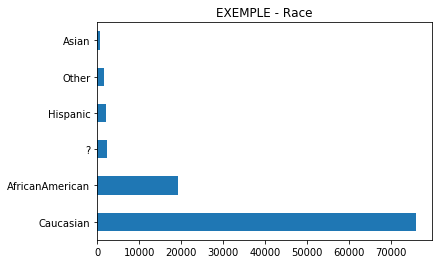

(Example.1): Est-ce que les valeurs sont bien distribuées? Non. Les valeurs sont très imbalancées.
(Example.2): Il y a 2273 valeures manquantes représentées par le symbole '?'.




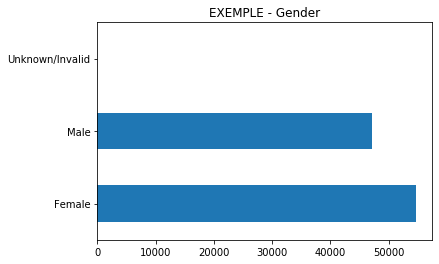

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64
(1.1): Est-ce que les valuers de 'gender' sont bien distribuées? Non. Les valeurs sont très imbalancées.
(1.2): Il y a 0 valeures manquantes. Par contre il y a trois valeurs 'Unknown/Invalid'. 



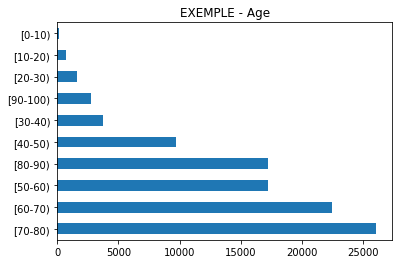

(2.1): Est-ce que les valuers de 'age' sont bien distribuées? Non. Les valeurs sont très imbalancées.
(2.2): Il y a 0 valeures manquantes.



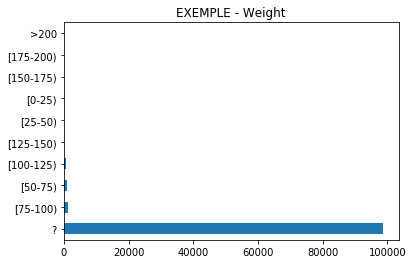

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64
(3.1): Est-ce que les valuers de 'weight' sont bien distribuées? Non. Les valeurs sont très imbalancées.
(3.2): Il y a 98569 valeures manquantes.



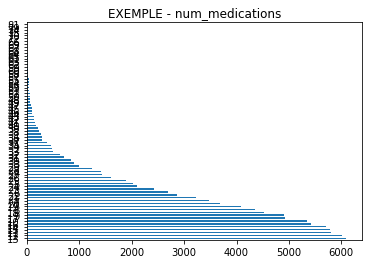

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
74       1
79       1
81       1
Name: num_medications, Length: 75, dtype: int64
(4.1): Est-ce que les valuers de 'num_medications' sont bien distribuées?  Non. Les valeurs sont très imbalancées.
(4.2): Il y a 0 valeures manquantes.



In [126]:
# Exemple pour l'attribut 'race'
X = pd.read_csv("dataset_diabetes/diabetic_data.csv")
plt.figure() # Crée une nouvelle figure
X["race"].value_counts().plot(kind="barh", title="EXEMPLE - Race")
plt.show()
print("(Example.1): Est-ce que les valeurs sont bien distribuées? Non. Les valeurs sont très imbalancées.")
print("(Example.2): Il y a 2273 valeures manquantes représentées par le symbole '?'.\n\n")


# Modifiez et répondez aux questions ci-dessous en vous aidant avec l'exemple.
# gender
plt.figure() # Crée une nouvelle figure
X["gender"].value_counts().plot(kind="barh", title="EXEMPLE - Gender")
plt.show()
print(X["gender"].value_counts())
print("(1.1): Est-ce que les valuers de 'gender' sont bien distribuées? Non. Les valeurs sont très imbalancées.")
print("(1.2): Il y a 0 valeures manquantes. Par contre il y a trois valeurs 'Unknown/Invalid'. \n")
# age
plt.figure() # Crée une nouvelle figure
X["age"].value_counts().plot(kind="barh", title="EXEMPLE - Age")
plt.show()
print("(2.1): Est-ce que les valuers de 'age' sont bien distribuées? Non. Les valeurs sont très imbalancées.")
print("(2.2): Il y a 0 valeures manquantes.\n")
# weight
plt.figure() # Crée une nouvelle figure
X["weight"].value_counts().plot(kind="barh", title="EXEMPLE - Weight")
plt.show()
print(X["weight"].value_counts())
print("(3.1): Est-ce que les valuers de 'weight' sont bien distribuées? Non. Les valeurs sont très imbalancées.")
print("(3.2): Il y a 98569 valeures manquantes.\n")
# num_medications
plt.figure() # Crée une nouvelle figure
X["num_medications"].value_counts().plot(kind="barh", title="EXEMPLE - num_medications")
plt.show()
print(X["num_medications"].value_counts())
print("(4.1): Est-ce que les valuers de 'num_medications' sont bien distribuées?  Non. Les valeurs sont très imbalancées.")
print("(4.2): Il y a 0 valeures manquantes.\n")

**4. Préparation de l'ensemble de données et prétraitement**

Nous ferons 2 étapes pour préparer les données pour l'expérimentation:  
1. Extraire l'attribut correspondant à la classe que nous voulons prédire pour en faire notre classe cible
2. Séparer l'ensemble de données en ensemble d'entraînement et ensemble de test.

In [127]:
# Cette étape ne peux être exécuté une fois, puisque la fonction pop enlève la colonne du dataset
y = X.pop("readmitted").values

In [128]:
# Séparer le dataset en ensemble d'entraînement et ensemble de test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(y_test.shape)

(81412, 49)
(20354,)


In [129]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Puisque le dataset est plustot grand, on choisi seulement certain attributs
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# Faire une copie des deux ensemble en fonction des attributs choisis
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# Si vous voulez essayer avec le dataset au complet (prends vraiment longtemps):
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# Appliquer l'encodage 'one-hot' aux attributs
ohe.fit(X_train_sf)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [130]:
# L'encodage renome les attributs. Impression du nom des nouveaux attributs
feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [131]:
# Maintenant on encode les deux ensemble (entraînement et test)
X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**<span style='color:#00BB27'>(TO DO) Q3 - 1 point<span>**   
Combien d'attributs avons-nous après l'encodage?   Il y **242** attribut apres l'encodage

Pourquoi y en a-t-il autant?  
    
Dans ce cas, un encodage à une fois peut être appliqué à la représentation entière. C’est là que la variable encodée en entier est supprimée et qu’une nouvelle variable binaire est ajoutée pour chaque valeur entière unique. Alors comme nous affectons une valeur binaire a plusieurs classes cela aggrandit enormement le nombre d'atrribut.
    
Montrer le format (*shape*) du dataset d'entraînement maintenant.

In [132]:
# Combien d'attributs avons-nous après l'encodage? (Vous devez coder)
print("Il y a " + str(X_train_sf_encoded.shape[1]) + " attribus") 
# Pourquoi y en a-t-il autant?

# Montrer le format (shape) du dataset d'entraînement maintenant.
print(X_train_sf_encoded.shape)

Il y a 242 attribus
(81412, 242)


**5. Modèle de base**  
Maintenant que nous avons transformé nos attributs, nous allons commencer par utiliser un classificateur de régression logistique pour effectuer un apprentissage supervisé sur notre dataset.


***5.1 Définition du classificateur de régression logistique***   
On défini notre classificateur avec scikit learn.

In [133]:
# Importer le classificateur
from sklearn.linear_model import LogisticRegression
import datetime

In [134]:
# Définition du modèle
clf_lr = LogisticRegression(solver='lbfgs', multi_class="multinomial", max_iter=1000, random_state=1)

***5.2 Entraînement du classificateur de régression logistique***  
Maintenant que notre modèle est défini, nous devons entraîner le modèle en utilisant l'ensemble d'entraînement pour prédire la classe *readmitted*.

In [135]:
def train_model(clf, X_train, y_train, epochs=10):
    """
    Cette fonction entraîne un model spécifié et retourne une liste 
    de résultats.
    
    :param clf: modèle scikit learn
    :param X_train: données d'entraînement encodés (attributs)
    :param y_train: données d'entraînement (classe à prédire)
    :param epochs: défault = 10, nombre d'itérations
    :return: résultats (accuracy) pour les données d'entraînement
    """
    scores = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        scores.append(score)
    print("Done training.")
    return scores

**<span style='color:#00BB27'>(TO DO) Q4 - 1 point<span>**  
Examiner la fonction *train_model* et expliquer le "clf.score()" (utilisé ci-bas). Vous pourrez regarder [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) du LogisticRegression pour comprendre le score.


Q4 - ANSWER HERE   

Explication du score: La fonction 'train_model' entraine le model celon le nombre indique par le parametre 'epochs' et il elle retoure alors une listes de tout les score obtenues. Les scores sont la précision moyenne sur les données et étiquettes de test données.

In [136]:
# Maintenant on va entrainer le modèle avec les données d'entraînement.
# Ici on spécifie 1 epoch, alors on recevera seulement 1 score
clf_lr_scores = train_model(clf_lr, X_train_sf_encoded, y_train, 1)
print(clf_lr_scores)

Starting training...
Epoch:1/1 -- 2020-11-01 22:10:50.614080
Done training.
[0.543654498108387]


**<span style='color:#00BB27'>(TO DO) Q5 - 2 points<span>**  

Pour cette question, exécuté la cellule ci-dessous. Par la suite, décrivez ce que le code fait. Ensuite regardant *seulement les résultats imprimé*, calculer l'accuracy. (Aucun code nécessaire)

In [137]:
# Afficher la prédiction des dix premiers exemples
y_predicted = clf_lr.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf_lr.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']
['>30' 'NO' 'NO' 'NO' '>30' '<30' '<30' '<30' '>30' '>30']


array([[0.06103005, 0.33432058, 0.60464937],
       [0.08767961, 0.26478055, 0.64753985],
       [0.06822555, 0.34953189, 0.58224256],
       [0.12212278, 0.34578436, 0.53209287],
       [0.0969803 , 0.2989083 , 0.60411139],
       [0.11742668, 0.36002385, 0.52254948],
       [0.08802388, 0.34997417, 0.56200194],
       [0.08059595, 0.29098768, 0.62841637],
       [0.09608122, 0.35272907, 0.55118971],
       [0.17710527, 0.40976254, 0.41313219]])

TO DO - Answers   

**1) Décrivez c'est quoi y_predicted:**  Predit les étiquettes de classe pour les 10 premier échantillons encode de 'X_train_sf_encoded'. Alors cela nous donnes la prediction de la classe 'readmited' des 10 premiers echantillons de 'X_train_sf_encoded'.

**2) Décrivez c'est quoi  y_train[0:10]:**   Cela est la liste des 10 premiers donnes d'entrainement qui est la classe a predire

**3) Décrivez c'est quoi clf_lr.predict_proba(X_train_sf_encoded[0:10]):**  Cela est la probabilite estimee pour chaque possibilites (<30, >30, NO) des 10 premiers echantillons encode de 'X_train_sf_encoded'

**4) Quelle est l'accuracy des résultats imprimé?** La precision des resulat imprime est de 30 %.

**5.3 Évaluation du modèle de régression logistique**   
Maintenant que nous avons entraîner notre modèle, évaluons ce modèle sur nos données test.

**<span style='color:#00BB27'>(TO DO) Q6 - 2 marks<span>**  

Évaluer le modèle sur les données 'test' en calculant le *score* et comparer les résultats aux données d'entraînement. Imprimer lequel est meilleur et donner une raison pourquoi les résultats sont ainsi.

In [139]:
# Utiliser les données test: X_test_sf_encoded
clf_lr_scores_test = clf_lr.score(X_test_sf_encoded, y_test)
# Calculer le score pour test et imprimer le.
print(clf_lr_scores_test, clf_lr_scores)
# Comparer le score test et le score d'entraînement
result_txt = 'Le score de test est plus grand avec : ' if clf_lr_scores_test > clf_lr_scores else "Le score d'entrainement est plus grand avec : "
result = clf_lr_scores_test if clf_lr_scores_test > clf_lr_scores else clf_lr_scores
# Imprimer lequel est meilleure
print(result_txt + str(result) )
# Donner une raison pourquoi?
print("Cela s'explique car le model contient un grand nombre de donnees et comme nous l'avons vu dans le notebook precedent pour la regression logistique un DataFrame overfitted  n'est pas adquate. ")

0.5392551832563623 [0.543654498108387]
Le score d'entrainement est plus grand avec : [0.543654498108387]
Cela s'explique car le model contient un grand nombre de donnees et comme nous l'avons vu dans le notebook precedent pour la regression logistique un DataFrame overfitted  n'est pas adquate. 


**6. Perceptron multi-couches**   
Après avoir travaillé avec notre modèle de base, nous allons utiliser le perceptron muti-couches comme classificateur.

***6.1 Définition du perceptron multi-couches***   
On le défini avec l'utilisation de scikit learn.

In [140]:
# Importation du modèle
from sklearn.neural_network import MLPClassifier

In [141]:
# Définition du modèle
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

**<span style='color:#00BB27'>(TO DO) Q7 - 3 points<span>**   
Expliquer *en vos mots* les paramètres choisi ci haut. Qu'est-ce qu'ils représentent et comment la sélection de ces valeurs affecterons le modèle. Pour ceux qui ne sont pas familiers, explorez la [documentation officielle] (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) et fournissez simplement de courtes phrases sur ce que font les paramètres en fonction de leurs descriptions et vos connaissances.

Q7 - ANSWER HERE   

*solver:*  Le solveur est le paramètre pour l’optimisation du poids.

*alpha:*  Paramètre de l'erreur L2 

*hidden_layer_size:*  L'élément ith représente le nombre de neurones dans la couche cachée ith

*random_state:* Détermine la génération aléatoire de nombres pour les poids et l’initialisation de biais. Un integer en parametre pour passer des résultats reproductibles sur plusieurs appels de fonction.

*max_iter:* Nombre maximum d’itérations. Le solveur itère jusqu’à atteindre la convergence ou ce nombre d’itérations.

*learning_rate_init:* Le taux d’apprentissage initial utilisé. Il contrôle la taille des échelons dans la mise à jour des poids.

*warm_start:*  Une fois défini à True, réutilisez la solution de l’appel précédent pour l’initialiser, sinon effacez simplement la solution précédente.

***6.2 Entraînemnt, test et discussion du perceptron multi-couches***  
Maintenant que le modèle est défini, nous devons l'entraîner avec l'ensemble d'entraînement pour apprendre à classer notre classe cible *readmitted*. Cette fois, nous allons entraîner le modèle avec plusieurs *epochs*. Enfin, nous allons visualiser nos scores, en discuter et les comparer avec le modèle de base.

In [142]:
def plotScores(scores_train, scores_test):
    """
    Visualizer les scores avec matplotlib.
    :param scores_train: Liste des scores d'entrainment
    :param scores_test: Liste des scores de test
    :return None
    """
    # Visualizer les points
    plt.plot([i for i in range(len(scores_train))], scores_train)
    plt.plot([i for i in range(len(scores_test))], scores_test)
    # Ajouter une légende
    plt.legend(["Train scores", "Test Scores"])
    # Renommé les axes
    plt.ylabel("Score")
    plt.xlabel("Epoch")
    plt.show()

**<span style='color:#00BB27'>(TO DO) Q8 - 6 points<span>**   
    
1. Vous devez créer une fonction train_and_evaluate () ci-dessous. Cette fonction doit prendre en entrée un classifieur, un enssemble d'entraînment (attributs et classe cible), un ensemble test (attributs et classe cible) et le nombre d'epochs. Inspirez-vous de la fonction fournie train_model () et entraînez le modèle pour 10 epochs. La fonction doit retourner deux listes de résultats (entraînement et test).
2. Une fois défini, entraînez clf_mlp avec train_and_evaluate() pendant dix epochs (cela prendra un certain temps en fonction du matériel de votre machine/hardware. Cela a pris environ 2-3 minutes / époque sur mon laptop).
3. Avec les résultats du perceptron mutli-couches, visualisez-les avec la fonction plotScores() ci-dessus.
4.  Décrivez le comportement des scores trouvés lors de l'entraînement. Est-ce que le l'ensemble d'entraînement ou de test ont produit les meilleurs résultats? Que signifient ces résultats?* 
5. Le perceptron à multi-couches a-t-il fait mieux ou pire que le modèle de régression logistique de base (et de combien - pourcentage)? Pourquoi pensez-vous que cela a eu un effet meilleur / pire?
6. Ici, nous suivons le score pendant que nous entraînons le modèle. Ceci est utile pour suivre l’évolution de l'entraînement. Compte tenu de votre réponse précédente sur le score, quelle serait une autre métrique utile à suivre pendant l’entraînement. Astuce: que minimisons-nous pendant l'entraînement?

In [143]:
# (TO DO) 8.1. Créer la fonction train_and_evaluate
def train_and_evaluate(clf, X_train, y_train, X_test, y_test,  epochs=10):
    """
    Cette fonction entraîne un model spécifié et retourne une liste 
    de résultats.
    
    :param clf: modèle scikit learn
    :param X_train: données d'entraînement (attributs)
    :param y_train: données d'entraînement (classe à prédire)
    :param X_test: données de test (attributs)
    :param y_test: données de test (classe à prédire)
    :param epochs: défault = 10, nombre d'itérations
    :return: résultats (accuracy) pour les données d'entraînement
    """
    scores_train = []
    scores_test = []
    print("Starting training...")
    for i in range(1, epochs + 1):
        print("Epoch:" + str(i) + "/" + str(epochs) + " -- " + str(datetime.datetime.now()))
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train, y_train)
        score_test = clf.score(X_test, y_test)
        scores_train.append(score_train)
        scores_test.append(score_test)
    print("Done training.")
    return scores_train, scores_test

In [144]:
# (TO DO) 8.2
# Entrainer pour *10* époques, pas 1. Ça prendra du temps...
# Il se peut qu'un message d'attention soit affiché. Ceci est dû au fait que nous avons ajouté des conditions de stop
# En réalité, nous aurions voulu que le modèle s'entraîne pour aussi longtemps que possible pour bien assimiler ou comprendre
# les données d'entraînement.
train_scores_mlp, test_scores_mlp = train_and_evaluate(clf_mlp, X_train_sf_encoded, y_train, X_test_sf_encoded, y_test)

Starting training...
Epoch:1/10 -- 2020-11-01 22:22:18.281218


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-11-01 22:24:24.584995


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-11-01 22:26:41.519121


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-11-01 22:28:56.578961


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-11-01 22:31:04.605994


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-11-01 22:33:21.630985


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-11-01 22:35:39.347611


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-11-01 22:37:54.241847


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-11-01 22:40:08.857800


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-11-01 22:42:22.131245


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training.


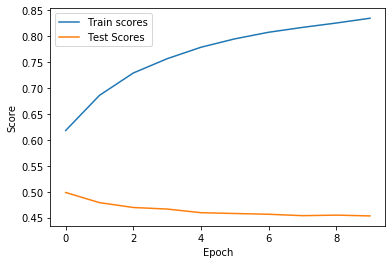

0.7649719943005945 0.46502407389210965
0.5392551832563623 [0.543654498108387]


In [146]:
# (TO DO) 8.3. Visualizer les résultats
from statistics import mean
plotScores(train_scores_mlp, test_scores_mlp)
print(mean(train_scores_mlp), mean(test_scores_mlp))
print(clf_lr_scores_test, clf_lr_scores)

(Réponses courtes)

* (TO DO) 8.4. Décrivez le comportement des scores trouvés lors de l'entraînement. Est-ce que le l'ensemble d'entraînement ou de test ont produit les meilleurs résultats? Que signifient ces résultats?*  

Nous pouvons remarquer que le score de l'ensemble de d'entrainement augment au fur et a meusure alors que celui de test diminue alors nous pouvons conclure que les score de l'ensemble d'entrainment sont meilleure.

* (TO DO) 8.5. Le perceptron à multi-couches a-t-il fait mieux ou pire que le modèle de régression logistique de base (et de combien - pourcentage)? Pourquoi pensez-vous que cela a eu un effet meilleur / pire?*  

Si on fait la moyenne des score de 'train_scores_mlp' et 'test_scores_mlp' nous pouvons remarquer que la moyenne des scores 'train_scores_mlp' et superieur d'environ 22% que le score de 'clf_lr_scores' (training model) et ceci et aussi le cas pour la moyenne des scores de 'test_scores_mlp' qui est inferieur a 'clf_lr_scores_test' d'environs 7%. Donc 'MLP' a un meilleur effet sur la prediction des donnes de d'entrainement alors que ce n'est pas le cas pour les donnes de test.

* (TO DO) 8.6. Ici, nous suivons le score pendant que nous entraînons le modèle. Ceci est utile pour suivre l’évolution de l'entraînement. Compte tenu de votre réponse précédente sur le score, quelle serait une autre métrique utile à suivre pendant l’entraînement. Astuce: Que minimisons-nous pendant l'entraînement?*  

Une meusure qui serait interesante est l'erreur-type car nous essayons de la minimiser chaque entrainement pour avoir des prediction juste.

**7. Essayer un modèle légèrement différent avec une sélection d'attributs différente**  
Maintenant que nous avons parcouru les classificateurs de base et perceptron à multi-couches, essayons un autre perceptron à multi-couches avec une sélection d'attributs plus petite. Cette fois, vous créerez le modèle avec des attributs aléatoires à partir de notre liste d'attributs d'origine. Cette question donne un apperçu de l'ensemble de la tâche.

**<span style='color:#00BB27'>(TO DO) Q9 - 5 points<span>**  
    
Créez une nouvelle liste d'attributs contenant seulement quatre attributs aléatoires à partir de la liste *featureSet*. Nous allons nommer cette liste *randomFeatures*. Afficher les attributs sélectionnés.

Utilisez ensuite cette liste pour compléter le processus d'encodage à l’aide de *ohe_rand*.

Ensuite, utiliser la fonction train_and_evaluate() pour entraîner le modèle clf_rand et visualiser les résultats. 

Finalement, comparé les résultats de clf_mlp et clf_rand en affichant les scores, dire lequel est meilleure.

In [148]:
import random

# Choisissez un seed
random.seed(8) 

# Définir l'encodeur 'one-hot'
ohe_random = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Liste d'attributs disponible pour la sélection aléatoire
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# TO DO - Choisissez quatres attributs avec la fonction random
randomFeatures = random.choices(featureSet,k=4)
print(randomFeatures)

# TO DO - Terminez le processus d'encodage
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# Appliquer l'encodage 'one-hot' aux attributs
ohe_random.fit(X_train_sf)
# L'encodage renome les attributs. Impression du nom des nouveaux attributs
feature_names = ohe.get_feature_names()
print(feature_names)
# Maintenant on encode les deux ensemble (entraînement et test)
X_train_sf_encoded = ohe_random.transform(X_train_sf)
X_test_sf_encoded = ohe_random.transform(X_test_sf)

['gender', 'num_medications', 'gender', 'num_lab_procedures']
['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' '

In [149]:
clf_rand = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=5, max_iter=120, learning_rate_init=0.01, warm_start=True)

# TO DO - Entraînez le modèle. Ceci va prendre du temps, alors je vous suggère de vous occupé en attendant et affiché les résultats
train_scores_rand, test_scores_rand = train_and_evaluate(clf_rand, X_train_sf_encoded, y_train,X_test_sf_encoded, y_test,10)



Starting training...
Epoch:1/10 -- 2020-11-01 22:45:55.640540


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:2/10 -- 2020-11-01 22:48:05.141506


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:3/10 -- 2020-11-01 22:50:21.918168


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:4/10 -- 2020-11-01 22:52:38.002950


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:5/10 -- 2020-11-01 22:54:48.164611


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:6/10 -- 2020-11-01 22:57:06.631188


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:7/10 -- 2020-11-01 22:59:24.656716


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:8/10 -- 2020-11-01 23:01:36.819724


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:9/10 -- 2020-11-01 23:03:49.641115


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Epoch:10/10 -- 2020-11-01 23:05:59.706803


C:\Users\Valentin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Done training.


0.46502407389210965 0.46502407389210965


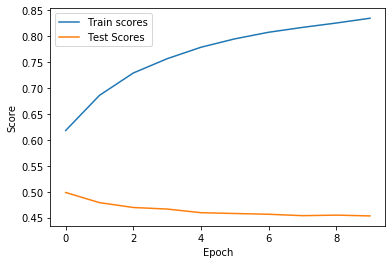

Alors on peut remarquer que le clf_rand est plus performant


In [155]:
# TO DO - Comparez les résultats de clf_mlp et clf_rand puis afficher les résultats des deux.
print(mean(test_scores_mlp), mean(test_scores_rand))
plotScores(train_scores_rand, test_scores_rand)
print("Alors on peut remarquer que ces deux models on la meme performance")

**8. En regardant la courbe de perte**  
Nous ferons une dernière exécution d'un perceptron à multi-couches, mais cette fois-ci, nous utiliserons solver = "SGD". Cela nous permet d’observer la courbe de perte au cours de l'entraînement.

In [156]:
clf_sgd = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(150, 150), random_state=1, max_iter=150, learning_rate_init=0.1, warm_start=True)

In [157]:
def plot_loss(clf):
    """
    Fonction pour visualizer la courbe des pertes.
    :param clf: classificateur avec solver="SGD"
    :returns: None
    """
    plt.plot(clf.loss_curve_)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

**<span style='color:#00BB27'>(TO DO) Q10 - 3 points<span>**   
    
Entrainer et évaluer le modèle en utilisant train_and_evaluate avec paramètre le epochs = 1. Puisqu'on utilise SGD, max_iter signifie le nombre d'epoch, qui est défini à 150 (max_iter=150). 

Ensuite, illustrez un graph qui montre le 'loss function'. Décrivez ce que le loss function représente et pourquoi il serait important d'y regarder.

In [ ]:
# Entrainer le modèle en spécifiant epochs =1 
train_scores_sgd, test_scores_sgd = train_and_evaluate(clf_sgd, X_train_sf_encoded, y_train,X_test_sf_encoded, y_test,1)

# Plot the loss of clf_sgd
plot_loss(clf_sgd)

# Expliquer pourquoi il serait important d'y regarder
"""
Le but d'entrainer un model en ML est de reduire au maximum l'erreur-type


"""

<div class="alert alert-info">  

**Optionel 0 points:**   
1. Modifiez les hyperparamètres et les attributs pour augmenter les résultats test.


2. Utiliser Keras. Ils offrent un wrapper pour Scikit-Learn

Note: Vous devez installer keras dabord. En utilisant Keras, vous réduisez le temps que ça prend pour entrainer vos modèles. Voici un exemple de la structure:

```python   
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(150, input_dim=241, activation="relu"))
    model.add(Dense(150, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model
   
model = KerasClassifier(build_fn=create_model, epochs=10)
history = model.fit(X_train_sf_encoded, y_train)```
</div>

#### Signature

Je, Valentin Magot 8843488 , declare que les réponses inscrites dans ce notebook sont les miennes.